Interesting Graphs to Show For Our Data:
    

1. We want to show comparative bar graphs regarding the male to female pronoun usage between subreddits. Below is the code for the graph. 

In [1]:
!pip install nltk

     |████████████████████████████████| 1.5MB 1.2MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449906 sha256=b18e51bcd5a3958588537677b1470e676d727c99664ebe7f8b99b25a748f99e7
  Stored in directory: /home/jovyan/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


0.007763727392523479
896219


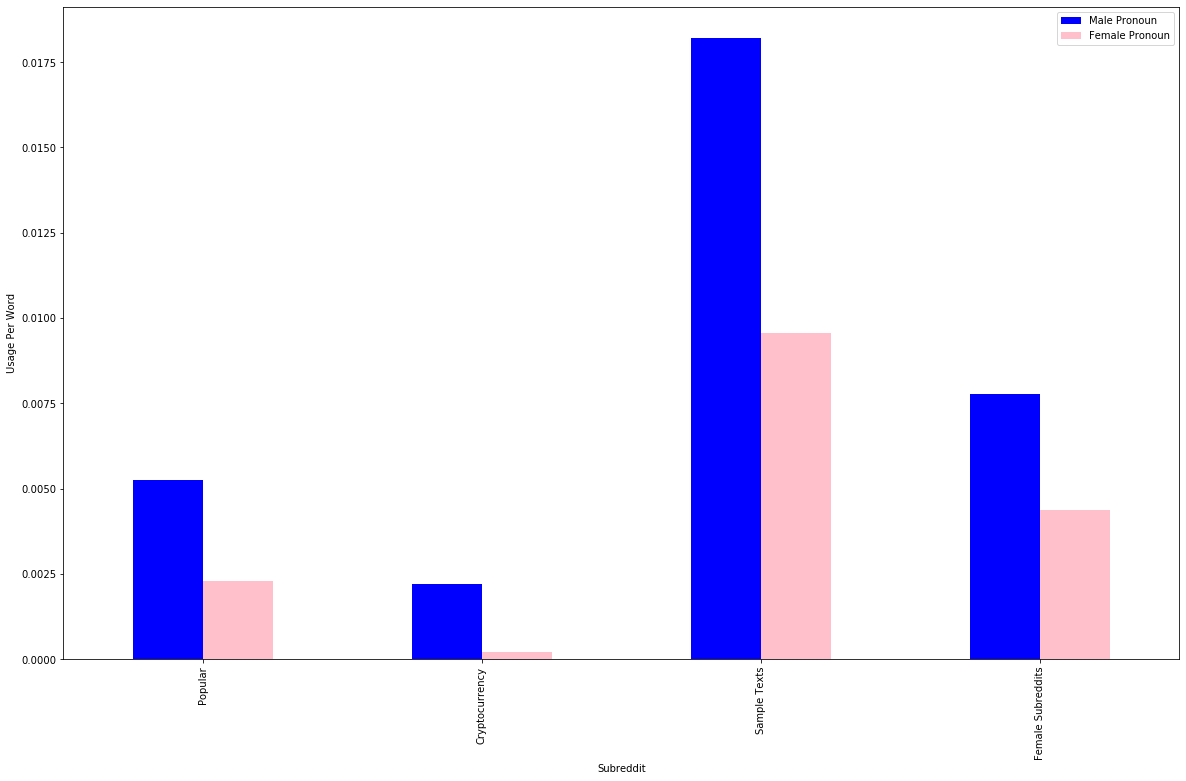

In [39]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk import punkt
from nltk import bigrams
from nltk import FreqDist
from nltk.corpus import brown
import matplotlib.pyplot as plt
#nltk.download('gutenberg')
#nltk.download('stopwords')



crypto_reddit_df = pd.read_csv('data/Comments/crypto_subreddit/combined-comments.csv')
pop_reddit_df = pd.read_csv('data/Comments/popular_reddits/output.csv')
women_reddit_df = pd.read_csv('data/Comments/women_subreddit/Combined-Women-csv')

crypto_comments = crypto_reddit_df['comment']
pop_comments = pop_reddit_df['comment']
women_comments = women_reddit_df['comment']

crypto_nltkprep_com = crypto_comments.str.cat(sep='; ')
pop_nltkprep_com = pop_comments.str.cat(sep='; ')
women_nltkprep_com = women_comments.str.cat(sep='; ')


#We want to remove all punctuation from each word. Or else .,? would be the most frequent occurrences
tokenizer = RegexpTokenizer(r'\w+')
crypto_tokenized_text = tokenizer.tokenize(crypto_nltkprep_com)
pop_tokenized_text = tokenizer.tokenize(pop_nltkprep_com)
women_tokenized_text = tokenizer.tokenize(women_nltkprep_com)
txt_tokenized_text = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt') + nltk.corpus.gutenberg.words('austen-emma.txt') + nltk.corpus.gutenberg.words('melville-moby_dick.txt') +nltk.corpus.gutenberg.words('blake-poems.txt')
    


crypto_filtered_word_freq = nltk.FreqDist(crypto_tokenized_text)
pop_filtered_word_freq = nltk.FreqDist(pop_tokenized_text)
txt_filtered_word_freq = nltk.FreqDist(txt_tokenized_text)
women_filtered_word_freq = nltk.FreqDist(women_tokenized_text)


crypto_words = crypto_filtered_word_freq.keys()
pop_words = pop_filtered_word_freq.keys()
txt_words = txt_filtered_word_freq.keys()
women_words = women_filtered_word_freq.keys()

women_dict = {
    'he':women_filtered_word_freq['he'] / len(women_tokenized_text),
    'him':women_filtered_word_freq['him']/ len(women_tokenized_text),
    'his':women_filtered_word_freq['his']/ len(women_tokenized_text),
    'she':women_filtered_word_freq['she']/ len(women_tokenized_text),
    'her':women_filtered_word_freq['her']/ len(women_tokenized_text),
    'hers':women_filtered_word_freq['hers']/ len(women_tokenized_text) 
    }

women_male = women_dict['he'] + women_dict['him'] + women_dict['his']
women_female = women_dict['she'] + women_dict['her'] + women_dict['hers']


txt_dict = {
    'he':txt_filtered_word_freq['he'] / len(txt_tokenized_text),
    'him':txt_filtered_word_freq['him']/ len(txt_tokenized_text),
    'his':txt_filtered_word_freq['his']/ len(txt_tokenized_text),
    'she':txt_filtered_word_freq['she']/ len(txt_tokenized_text),
    'her':txt_filtered_word_freq['her']/ len(txt_tokenized_text),
    'hers':txt_filtered_word_freq['hers']/ len(txt_tokenized_text) 
    }

txt_male = txt_dict['he'] + txt_dict['him'] + txt_dict['his']
txt_female = txt_dict['she'] + txt_dict['her'] + txt_dict['hers']

crypto_dict = {
    'he':crypto_filtered_word_freq['he'] / len(crypto_tokenized_text),
    'him':crypto_filtered_word_freq['him']/ len(crypto_tokenized_text),
    'his':crypto_filtered_word_freq['his']/ len(crypto_tokenized_text),
    'she':crypto_filtered_word_freq['she']/ len(crypto_tokenized_text),
    'her':crypto_filtered_word_freq['her']/ len(crypto_tokenized_text),
    'hers':crypto_filtered_word_freq['hers']/ len(crypto_tokenized_text) 
    }

crypto_male = crypto_dict['he'] + crypto_dict['him'] + crypto_dict['his']
crypto_female = crypto_dict['she'] + crypto_dict['her'] + crypto_dict['hers']

pop_dict = {
    'he':pop_filtered_word_freq['he'] / len(pop_tokenized_text),
    'him':pop_filtered_word_freq['him']/ len(pop_tokenized_text),
    'his':pop_filtered_word_freq['his']/ len(pop_tokenized_text),
    'she':pop_filtered_word_freq['she']/ len(pop_tokenized_text),
    'her':pop_filtered_word_freq['her']/ len(pop_tokenized_text),
    'hers':pop_filtered_word_freq['hers']/ len(pop_tokenized_text) 
}

pop_male = pop_dict['he'] + pop_dict['him'] + pop_dict['his']
pop_female = pop_dict['she'] + pop_dict['her'] + pop_dict['hers']


print(women_male)
print(len(women_tokenized_text))

data = {'Label': ['Male Pronoun', 'Male Pronoun', 'Male Pronoun', 'Female Pronoun', 'Female Pronoun', 'Female Pronoun'], 
        'Reddit':['Popular', 'Crypto', 'Emma', 'Popular', 'Crypto', 'Emma'], 
        'Usage Per Post': [pop_male, crypto_male, txt_male, women_male,
                           pop_female, crypto_female, txt_female, women_female]}
                                                                                              
pronouns_df = pd.DataFrame([[pop_male, pop_female], 
                            [crypto_male, crypto_female],
                            [txt_male, txt_female], 
                            [women_male, women_female]],
                           columns=['Male Pronoun', 'Female Pronoun'])

pronouns_df['Subreddit'] = ['Popular', 'Cryptocurrency', 'Sample Texts', 'Female Subreddits']
pronouns_df = pronouns_df.set_index('Subreddit')
ax = pronouns_df.plot(kind = 'bar', figsize = (20, 12), color = ['b','pink'])
ax.set_ylabel('Usage Per Word')

ax

2. Next, we want to show the bar graphs regarding male and female gendered words and how prevalent they are. g


Text(0, 0.5, 'Usage Per Word')

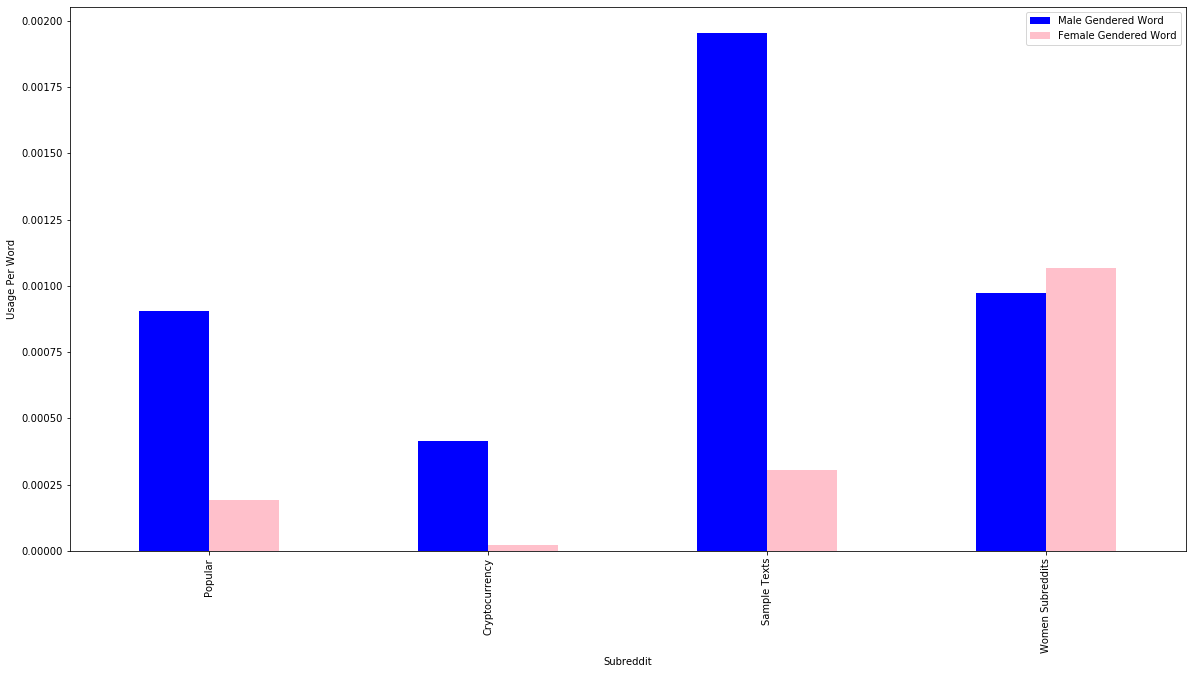

In [7]:
all_man_words = {}
male_genderness_words = {}
female_genderness_words = {}
 
gendered_word_list_m = ['man-made', 'manpower', 'mankind',  'Caveman', 'hitman','Chairman', 'mans', 'salesman', 'middleman', 'businessman', 'man', 'frontman', 'freshman', 'cameraman', 'Anchorman', 'salesman', 'fisherman', 'manmade', 'mailman', 
                        'Gentleman', 'caveman', 'plowman', 'congressman', 'manyboy', 'craftsman', 'foreman', 'Salesman', 'mankind', 'gentleman', 'tradesman', 'clergyman', 'coachman', 'coachmen', 'gentlemen', 'Gentlemen', 'workmen'
                       'horseman', 'Horseman', 'mansplaining', 'mansplainer', 'mansplain',  'manspreading', 'layman', 'manosphere', 'manly', 'silverman', 'manlihood', 'dude', 'bro']
gendered_word_list_f = ['woman', 'women', 'Women','girl','Woman','Cavewoman', 'cavewoman', 'congresswoman', 'Chairwoman', 'spokeswoman', 'gentlewoman', 'horsewoman', 'superwoman', 'womanhood', 
                       'sportswoman', 'womankind', 'Catwoman', 'womansplaining', 'womanist', 'womanly', 'womenhood', 'saleswomen', 'askwomen', 'Askwomen', 'womenz', 'women_who_have_been_successful_in_showing_their', 'unwomen', 'womenofscience', 'housewomen', 'businesswomen', 'bluecollarwomen']
    
    
def gendered_words( total_words, dict_of_words):
    for key in total_words:
        if (key[-3:] == 'man'):
            all_man_words[key] = key
        elif (key[:3] == 'man'):
            all_man_words[key] = key
    #print(all_man_words.keys())
    m_count = 0
    
    for index in gendered_word_list_m: 
        if index in dict_of_words:
            male_genderness_words[index] = dict_of_words[index]
            m_count += dict_of_words[index]

    f_count = 0
    for index in gendered_word_list_f: 
        if index in all_man_words:
            female_genderness_words[index] = dict_of_words[index]
            f_count += dict_of_words[index]
    
    return (m_count, f_count)


crypto_gen = gendered_words(crypto_filtered_word_freq.keys(), crypto_filtered_word_freq)
pop_gen = gendered_words(pop_filtered_word_freq.keys(), pop_filtered_word_freq)
txt_gen = gendered_words(txt_filtered_word_freq.keys(), txt_filtered_word_freq)
women_gen = gendered_words(women_filtered_word_freq.keys(), women_filtered_word_freq)


data = {'Label': ['Male Gendered Word', 'Male Gendered Word', 'Male Gendered Word',
                  'Female Gendered Word', 'Female Gendered Word', 'Female Gendered Word'],
        'Reddit':['Popular', 'Crypto', 'Emma', 'Popular', 'Crypto', 'Emma'], 
        'Usage Per Post': [pop_gen[0] / len(pop_tokenized_text), crypto_gen[0] / len(crypto_tokenized_text), txt_gen[0] / len(txt_tokenized_text), women_gen[0] / len(women_tokenized_text), 
                           pop_gen[1] / len(pop_tokenized_text), crypto_gen[1] / len(crypto_tokenized_text), txt_gen[1] / len(txt_tokenized_text), women_gen[1] / len(women_tokenized_text)]}

gendered_df = pd.DataFrame([[pop_gen[0] / len(pop_tokenized_text), pop_gen[1] / len(pop_tokenized_text)], 
                            [crypto_gen[0] / len(crypto_tokenized_text), crypto_gen[1] / len(crypto_tokenized_text)], 
                            [txt_gen[0] / len(txt_tokenized_text), txt_gen[1] / len(txt_tokenized_text)],
                            [women_gen[0] / len(women_tokenized_text), women_gen[1] / len(women_tokenized_text)]],
                           columns=['Male Gendered Word', 'Female Gendered Word'])

gendered_df['Subreddit'] = ['Popular', 'Cryptocurrency', 'Sample Texts', 'Women Subreddits']
gendered_df = gendered_df.set_index('Subreddit')
ax = gendered_df.plot(kind = 'bar', color = ['b', 'pink'], figsize = [20, 10])
ax.set_ylabel('Usage Per Word')

In [4]:
gendered_df['Percent of Male'] = gendered_df['Female Gendered Word'] / gendered_df['Male Gendered Word']
gendered_df

pronouns_df['Percent of Male'] = pronouns_df['Female Pronoun'] / pronouns_df['Male Pronoun']
pronouns_df

,Male Pronoun,Female Pronoun,Percent of Male
Subreddit,,,
Popular,0.005265,0.002287,0.434382
Cryptocurrency,0.002208,0.000206,0.093379
Emma,0.016687,0.021717,1.301464
Female Subreddits,0.007764,0.004385,0.564817


We will be conducting hypothesis tests to ensure that the male:female ratio for cryptocurrency subreddits is statistically significant from its other resources. 

First, we will create a table of the name of the source, and its male-to female ratio for pronoun usage and gendered word usage

In [41]:
import os
d = {'Name': [], 'Female Pronoun':[], 'Pronoun M/F': [], 'Gendered Female':[], 'Gendered M/F':[]}
subreddit_db = pd.DataFrame(data = d)

def addSubreddit(subreddit):
    sub_comments = subreddit['comment']
    
    sub_nltkprep_com = sub_comments.str.cat(sep='; ')
    tokenizer = RegexpTokenizer(r'\w+')
    sub_tokenized_text = tokenizer.tokenize(sub_nltkprep_com)
    sub_filtered_word_freq = nltk.FreqDist(sub_tokenized_text)
    sub_words = sub_filtered_word_freq.keys()
    sub_male = sub_filtered_word_freq['he'] + sub_filtered_word_freq['him'] + sub_filtered_word_freq['his']
    sub_female = sub_filtered_word_freq['she'] + sub_filtered_word_freq['her'] + sub_filtered_word_freq['hers']
    
    if sub_female == 0:
        pronoun_ratio = sub_male
    else:  
        pronoun_ratio = sub_male / sub_female 
    
    sub_gen = gendered_words(sub_filtered_word_freq.keys(), sub_filtered_word_freq)
    
    if sub_gen[1] == 0:
        gendered_ratio = sub_gen[0]
    else:  
        gendered_ratio = sub_gen[0] / sub_gen[1] 
    
    return (pronoun_ratio, gendered_ratio, sub_female/len(sub_tokenized_text), sub_gen[1]/len(txt_tokenized_text))
    
def addText(txt_tokenized_text):
    txt_filtered_word_freq = nltk.FreqDist(txt_tokenized_text) 
    txt_words = txt_filtered_word_freq.keys()

    txt_male = txt_filtered_word_freq['he'] + txt_filtered_word_freq['him'] + txt_filtered_word_freq['his']
    txt_female = txt_filtered_word_freq['she'] + txt_filtered_word_freq['her'] + txt_filtered_word_freq['hers']
    
    pronoun_ratio = txt_male / txt_female
    txt_gen = gendered_words(txt_filtered_word_freq.keys(), txt_filtered_word_freq)
    
    if txt_gen[1] == 0:
        gendered_ratio = txt_gen[0]
    else:  
        gendered_ratio = txt_gen[0] / txt_gen[1] 
    
    return (pronoun_ratio,  gendered_ratio, txt_female/len(txt_tokenized_text), txt_gen[1]/len(txt_tokenized_text))

    
for filename in os.listdir('data/Comments/women_subreddit'):
    new_data = addSubreddit(pd.read_csv('data/Comments/women_subreddit/' + filename))
    subreddit_db = subreddit_db.append({'Name': filename, 'Pronoun Female': new_data[2], 'Pronoun M/F': new_data[0], 'Gendered Female': new_data[3], 'Gendered M/F': new_data[1]}, ignore_index = True)
    
for filename in os.listdir('data/Comments/popular_reddits'):
    new_data = addSubreddit(pd.read_csv('data/Comments/popular_reddits/' + filename))
    subreddit_db = subreddit_db.append({'Name': filename, 'Pronoun Female': new_data[2], 'Pronoun M/F': new_data[0], 'Gendered Female': new_data[3], 'Gendered M/F': new_data[1]}, ignore_index = True)

for filename in [nltk.corpus.gutenberg.words('shakespeare-hamlet.txt'), nltk.corpus.gutenberg.words('austen-emma.txt'), nltk.corpus.gutenberg.words('melville-moby_dick.txt'), nltk.corpus.gutenberg.words('blake-poems.txt')]:
    new_data = addText(filename)
    subreddit_db = subreddit_db.append({'Name': filename, 'Pronoun Female': new_data[2], 'Pronoun M/F': new_data[0], 'Gendered Female': new_data[3], 'Gendered M/F': new_data[1]}, ignore_index = True)

subreddit_db

,Name,Female Pronoun,Pronoun M/F,Gendered Female,Gendered M/F,Pronoun Female
0,allwomen_comments.csv,NaN,0.414013,0.000060,0.233333,0.006321
1,AsianXX.csv,NaN,0.506667,0.000044,0.727273,0.008749
2,AskFeminists.csv,NaN,1.517787,0.000782,0.838462,0.002517
3,AskWomen_comments.csv,NaN,2.551335,0.000417,1.206731,0.005377
4,blackladies.csv,NaN,0.924675,0.000096,0.916667,0.006964
5,blackladies_comments.csv,NaN,0.506667,0.000044,0.727273,0.008749
6,careerwomen.csv,NaN,3.250000,0.000016,0.875000,0.001419
7,Combined-Women-csv,NaN,1.770483,0.001920,0.910230,0.004385
8,DosXXLatinas.csv,NaN,1.181818,0.000008,1.000000,0.001612
9,Feminism_comments.csv,NaN,1.406780,0.000130,0.630769,0.003679


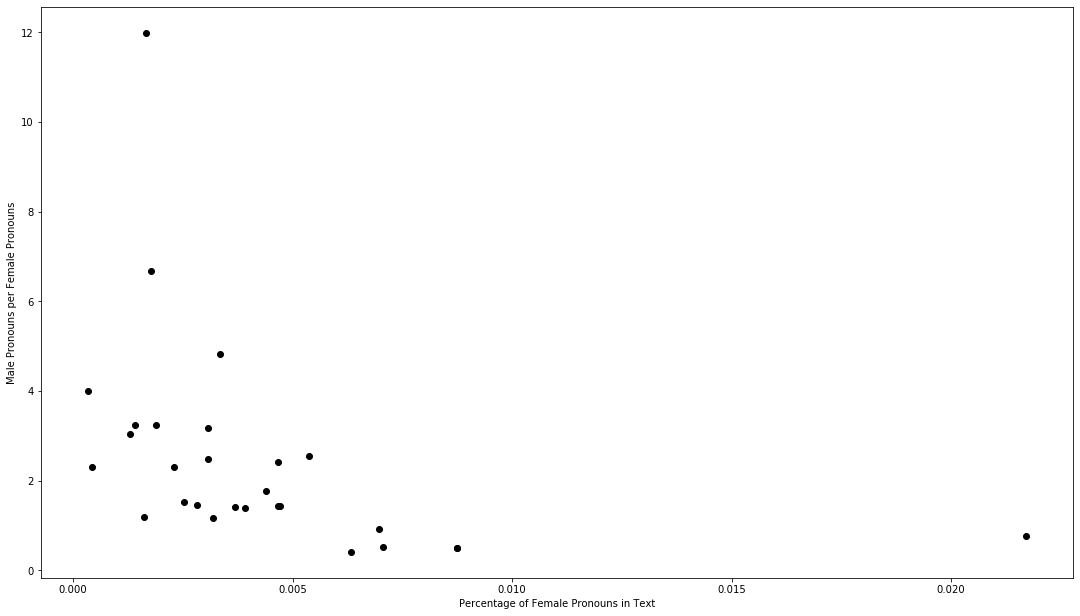

In [34]:
import matplotlib.pyplot as plt

graph = plt.plot(subreddit_db['Pronoun Female'], subreddit_db['Pronoun M/F'], 'o', color='black')

plt.xlabel('Percentage of Female Pronouns in Text')
plt.ylabel('Male Pronouns per Female Pronouns')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)


graph


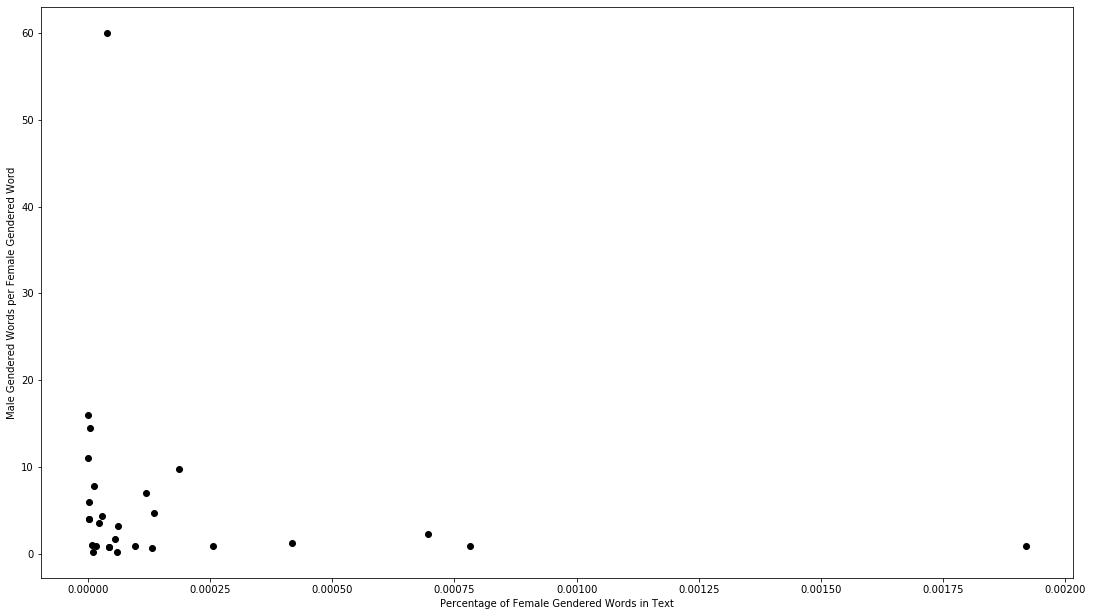

In [50]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig1 = plt.plot(subreddit_db['Gendered Female'], subreddit_db['Gendered M/F'], 'o', color='black')

plt.xlabel('Percentage of Female Gendered Words in Text')
plt.ylabel('Male Gendered Words per Female Gendered Word')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
fig1

In [59]:
import scipy.stats as stats
import numpy as np
#Check linear regression plot point for each cryptocurrency subreddit. 

mean_f_m = subreddit_db['Pronoun M/F'].mean()
std_f_m = np.std(subreddit_db['Pronoun M/F'])

mean_f_m_gendered = subreddit_db['Gendered M/F'].mean()
#std_f_m_gendered = subreddit_db['Gendered M/F'].std()
std_f_m_gendered = ((abs(subreddit_db['Gendered M/F'] - subreddit_db['Gendered M/F'].mean())**2).mean())**0.5

test_pro = 0.05

def checkRegressionPronoun(pronoun_test):
    #z_score = (pronoun_test - mean_f_m) / ((pronoun_test)*(1-pronoun_test)/len(subreddit_db))**0.5
    z_score = (pronoun_test - mean_f_m) / std_f_m
    #test_statistic = (pronoun_test - test_pro) / ((test_pro)*(1-test_pro) / (len(subreddit_db)))**0.5
    return (z_score > 2.326)
    
def checkRegressionGendered(gendered_test):
    z_score = (gendered_test - mean_f_m_gendered) / std_f_m_gendered
    print(z_score)
    return (z_score > 2.326)#z_score = (gendered_test - mean_f_m_gendered) / ((gendered_test)*(1-gendered_test)/len(subreddit_db))**0.5
    #test_statistic = (pronoun_test - test_pro) / ((test_pro)*(1-test_pro) / (len(subreddit_db)))**0.5
    
    
for filename in os.listdir('data/Comments/crypto_subreddit'):
    new_data = addSubreddit(pd.read_csv('data/Comments/crypto_subreddit/' + filename))
    #print(checkRegressionPronoun(new_data[0]))
    print(checkRegressionGendered(new_data[1]))





0.08604530303154115
False
-0.09232369760994423
False
0.30900655383339787
False
0.30900655383339787
False
1.1116670567200821
False
2.5832113120123363
True
-0.5382461992136577
False
-0.2706926982514296
False
-0.5382461992136577
False
1.512997308163424
False
-0.5382461992136577
False
